In [ ]:
# download data in 2019
!curl -O "https://s3.amazonaws.com/tripdata/2019[01-12]-citibike-tripdata.csv.zip"

## - Prelineary Exploratory Data Analysis: **Dock Availability**

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from IPython.display import Image
import datetime

In [77]:
# read in data from Jan, 2019 to Dec, 2019
def read_in_data(path):
    csv_file_list = []
    files = os.listdir(path)
    for file in files:
        if file.endswith('.csv'):
            filePath = path+'/'+file
            csv_file = pd.read_csv(filePath)
            csv_file_list.append(csv_file)
    return csv_file_list

In [78]:
csv_file_list = read_in_data('.')

In [79]:
# column names are not consistent in datasets of different month, so we need to correct them 
for file in csv_file_list:
    file.rename(columns = {'birth year':'birth_year','end station id':'end_station_id',
                           'end station latitude':'end_station_latitude','end station longitude':'end_station_longitude',
                          'end station name':'end_station_name','start station id':'start_station_id',
                          'start station latitude':'start_station_latitude','start station longitude':'start_station_longitude',
                          'start station name':'start_station_name'}, inplace = True)

In [80]:
# concat dataframes of 12 months into one big dataframe
bike2019 = pd.concat(csv_file_list, ignore_index=True)

In [115]:
# save it to csv
bike2019.to_csv("CitiBike_2019_02_11.csv")

In [4]:
# read the csv
bike2019 = pd.read_csv("CitiBike_2019_02_11.csv")

In [60]:
bike2019.head(10)

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,219,2019-02-01 00:00:06.2570,2019-02-01 00:03:46.1090,3494.0,E 115 St & Lexington Ave,40.797911,-73.942300,3501.0,E 118 St & Madison Ave,40.801487,-73.944251,33450,Subscriber,1989,1
1,143,2019-02-01 00:00:28.0320,2019-02-01 00:02:51.7460,438.0,St Marks Pl & 1 Ave,40.727791,-73.985649,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,25626,Subscriber,1990,1
2,296,2019-02-01 00:01:13.9870,2019-02-01 00:06:10.7340,3571.0,Bedford Ave & Bergen St,40.676368,-73.952918,3549.0,Grand Ave & Bergen St,40.678045,-73.962408,35568,Subscriber,1987,1
3,478,2019-02-01 00:01:14.1520,2019-02-01 00:09:12.7870,167.0,E 39 St & 3 Ave,40.748901,-73.976049,477.0,W 41 St & 8 Ave,40.756405,-73.990026,25045,Subscriber,1964,2
4,225,2019-02-01 00:01:49.3410,2019-02-01 00:05:34.4980,3458.0,W 55 St & 6 Ave,40.763094,-73.978350,3443.0,W 52 St & 6 Ave,40.761330,-73.979820,34006,Subscriber,1979,1
5,457,2019-02-01 00:02:04.0010,2019-02-01 00:09:41.5640,3078.0,Broadway & Roebling St,40.709248,-73.960631,3016.0,Kent Ave & N 7 St,40.720368,-73.961651,33858,Subscriber,1981,2
6,175,2019-02-01 00:02:12.2960,2019-02-01 00:05:08.0930,411.0,E 6 St & Avenue D,40.722281,-73.976687,317.0,E 6 St & Avenue B,40.724537,-73.981854,24839,Subscriber,1995,1
7,248,2019-02-01 00:02:13.0450,2019-02-01 00:06:21.3960,3628.0,Lenox Ave & W 117 St,40.802557,-73.949078,3506.0,Lexington Ave & E 120 St,40.801307,-73.939817,31798,Subscriber,1991,1
8,541,2019-02-01 00:02:28.0750,2019-02-01 00:11:29.5490,293.0,Lafayette St & E 8 St,40.730207,-73.991026,383.0,Greenwich Ave & Charles St,40.735238,-74.000271,32175,Subscriber,1981,0
9,406,2019-02-01 00:03:06.5420,2019-02-01 00:09:53.4310,380.0,W 4 St & 7 Ave S,40.734011,-74.002939,3263.0,Cooper Square & Astor Pl,40.729515,-73.990753,27688,Subscriber,1973,2


In [62]:
#bike2019.drop('Unnamed: 0', axis = 1, inplace = True)

In [61]:
bike2019.shape

(17585202, 15)

In [62]:
bike2019.columns

Index(['tripduration', 'starttime', 'stoptime', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender'],
      dtype='object')

In [63]:
# check null values
bike2019.isnull().sum()

tripduration                 0
starttime                    0
stoptime                     0
start_station_id           162
start_station_name         162
start_station_latitude       0
start_station_longitude      0
end_station_id             162
end_station_name           162
end_station_latitude         0
end_station_longitude        0
bikeid                       0
usertype                     0
birth_year                   0
gender                       0
dtype: int64

In [64]:
# remove null values
bike2019.dropna(inplace = True)

In [65]:
bike2019.shape

(17585040, 15)

     we first start with analyzing users to have basic understanding of bike users

### About User

In [66]:
# calculate the age of bike users
bike2019['Age_of_User'] = 2019 - bike2019['birth_year']

In [67]:
### age distribution of subscribers 
subscriber = bike2019[bike2019['usertype'] == 'Subscriber']
subr_age = pd.DataFrame(subscriber.groupby('Age_of_User')['usertype'].value_counts())
subr_age.rename(columns = {'usertype':'count'}, inplace = True)
subr_age = subr_age.reset_index()
subr_age

,Age_of_User,usertype,count
0,16,Subscriber,4332
1,17,Subscriber,12267
2,18,Subscriber,34880
3,19,Subscriber,68655
4,20,Subscriber,98480
...,...,...,...
103,131,Subscriber,897
104,132,Subscriber,258
105,133,Subscriber,248
106,134,Subscriber,247


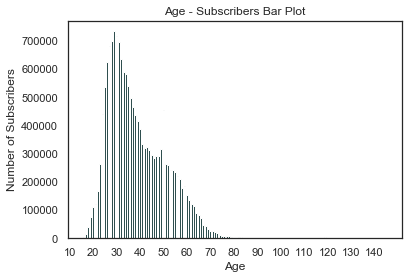

In [212]:
with sns.color_palette("deep"):
    _ = plt.bar(subr_age['Age_of_User'], subr_age['count'], color = 'darkslategrey')
    _ = plt.title('Age - Subscribers Bar Plot')
    _ = plt.xlabel('Age')
    _ = plt.ylabel('Number of Subscribers') 
    _ = plt.xticks(np.arange(10,150,10))

 **we can see that most of the subscribers age around 25 to 40 years old**

In [107]:
### age distribution of customers
customer = bike2019[bike2019['usertype'] == 'Customer']
cust_age = pd.DataFrame(customer.groupby('Age_of_User')['usertype'].value_counts())
cust_age.rename(columns = {'usertype':'count'}, inplace = True)
cust_age = cust_age.reset_index()
cust_age

,Age_of_User,usertype,count
0,16,Customer,4294
1,17,Customer,11602
2,18,Customer,20586
3,19,Customer,40798
4,20,Customer,42719
...,...,...,...
97,131,Customer,10
98,134,Customer,9
99,139,Customer,1
100,156,Customer,2


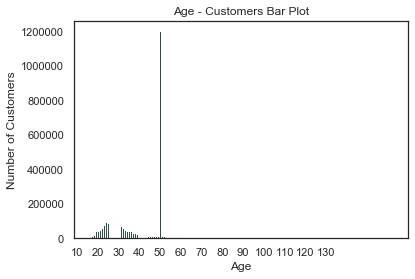

In [213]:
with sns.color_palette("deep"):
    _ = plt.bar(cust_age['Age_of_User'], cust_age['count'], color = 'darkslategrey')
    _ = plt.title('Age - Customers Bar Plot')
    _ = plt.xlabel('Age')
    _ = plt.ylabel('Number of Customers') 
    _ = plt.xticks(np.arange(10,140,10))

- **number of subscribers at certain age level is normally larger than customers at the same age level**
- **number of subscribers at age of 50 (**450000**) is significantly smaller than customers at age of 50 (**1200000**) , why is that? can we do something to attract them to subsribe?**

In [137]:
trip_duration = bike2019[['tripduration','usertype','Age_of_User']].groupby(['usertype','Age_of_User']).mean().reset_index()
trip_duration.rename(columns = {'tripduration':'avg_trip_duration'}, inplace = True)
trip_duration

,usertype,Age_of_User,avg_trip_duration
0,Customer,16,1955.216348
1,Customer,17,1755.815290
2,Customer,18,1842.916837
3,Customer,19,2165.479558
4,Customer,20,1948.035020
...,...,...,...
206,Subscriber,131,726.730080
207,Subscriber,132,1096.345725
208,Subscriber,133,1103.977941
209,Subscriber,134,1013.953668


Text(0.5, 1.0, 'Age - Average Trip Duration Line Plot(Subscriber VS Customer)')

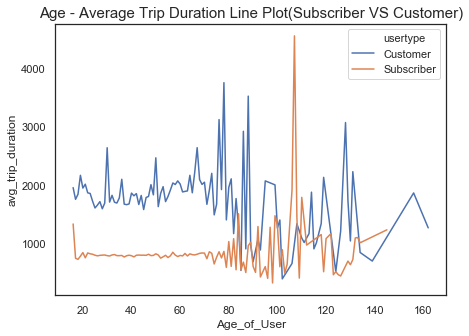

In [151]:
plt.figure(figsize = (7,5))
sns.set(style='white')
sns.lineplot(x = "Age_of_User", y = "avg_trip_duration", data = trip_duration, hue = "usertype",
            dashes = False, 
            markers = ["o", "<"],  legend="brief")
plt.title("Age - Average Trip Duration Line Plot(Subscriber VS Customer)", fontsize = 15)

- avg_trip_duration of **Customer** is longer than that of **Subscriber**
- is **Subscriber** more valuable than **Customer**? we need to dive deep

### About Start Station

Definition of **start station**: stations where users take the bike and start the bike trips

In [161]:
start_station = bike2019.groupby('start_station_id').count().reset_index().sort_values(by='tripduration',ascending = False)
start_station

,start_station_id,bikeid,birth_year,end_station_id,end_station_latitude,end_station_longitude,end_station_name,gender,start_station_latitude,start_station_longitude,start_station_name,starttime,stoptime,tripduration,usertype,Age_of_User
255,519.0,149013,149013,149013,149013,149013,149013,149013,149013,149013,149013,149013,149013,149013,149013,149013
237,497.0,115622,115622,115622,115622,115622,115622,115622,115622,115622,115622,115622,115622,115622,115622,115622
427,3255.0,114427,114427,114427,114427,114427,114427,114427,114427,114427,114427,114427,114427,114427,114427,114427
158,402.0,107928,107928,107928,107928,107928,107928,107928,107928,107928,107928,107928,107928,107928,107928,107928
66,285.0,107450,107450,107450,107450,107450,107450,107450,107450,107450,107450,107450,107450,107450,107450,107450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,3831.0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
890,3867.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
908,3887.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
228,488.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


There are a total of **921** start stations in year 2019

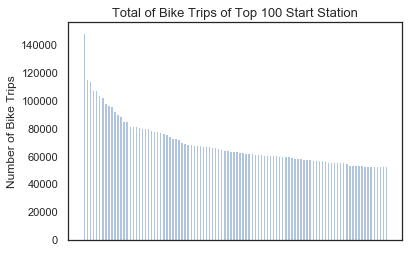

In [215]:
# barplot for start stations with Top 100 Total Bike Trips
plt.figure()
sns.set(style = 'white')
plt.bar(np.arange(0,100),start_station['tripduration'][0:100], color = 'lightsteelblue')
plt.title("Total of Bike Trips of Top 100 Start Station", fontsize = 13)
plt.xticks([])
plt.ylabel('Number of Bike Trips')
plt.show()

Top 100 start stations have an average of 167 ~ 362 biketrips per day

In [235]:
# retrieve the station_id for Top 100 start stations
Top_100_Start_Station = pd.DataFrame({'start_station_id':start_station['start_station_id'].head(100)}).reset_index().drop('index',axis = 1)
Top_100_Start_Station = Top_100_Start_Station.astype(object)
Top_100_Start_Station

,start_station_id
0,519
1,497
2,3255
3,402
4,285
...,...
95,447
96,301
97,212
98,2008


In [236]:
# retrieve station_name, latitude and longitude for Top 100 start stations
Top_100_Start_Station = pd.merge(Top_100_Start_Station, bike2019[['start_station_id','start_station_latitude','start_station_longitude','start_station_name']], 
                                 how = 'inner', left_on = 'start_station_id',
                                 right_on = 'start_station_id').drop_duplicates(subset = 'start_station_id')
Top_100_Start_Station

,start_station_id,start_station_latitude,start_station_longitude,start_station_name
0,519,40.751873,-73.977706,Pershing Square North
149013,497,40.737050,-73.990093,E 17 St & Broadway
264635,3255,40.750585,-73.994685,8 Ave & W 31 St
379062,402,40.740343,-73.989551,Broadway & E 22 St
486990,285,40.734546,-73.990741,Broadway & E 14 St
...,...,...,...,...
6696026,447,40.763707,-73.985162,8 Ave & W 52 St
6748988,301,40.722174,-73.983688,E 2 St & Avenue B
6801934,212,40.743349,-74.006818,W 16 St & The High Line
6854825,2008,40.705693,-74.016777,Little West St & 1 Pl


In [289]:
# Create a visualization map for Top_100_Start_Station
top_m = folium.Map(location=[40.7128,-74.0060], zoom_start = 12, tiles = 'CartoDB dark_matter')

top_mc = MarkerCluster(name = "Marker Cluster")

for row in Top_100_Start_Station.itertuples():
    pop_up = "station_id:{}, start_station_name:{}".format(row.start_station_id,
                                                           row.start_station_name)
    top_mc.add_child(folium.CircleMarker(location = [row.start_station_latitude,  row.start_station_longitude],
                 popup = pop_up,
                 radius= 5,
                 color="green",
                 fill = True))

top_m.add_child(top_mc)
top_m

You can see from the map that the busiest start stations mainly locate in two districts, which are very likely to be the **residential areas** in New York

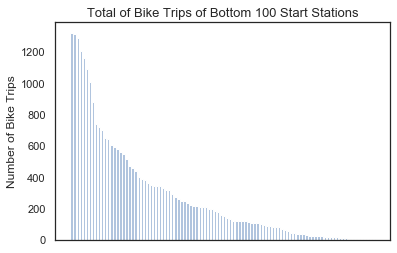

In [279]:
# barplot for 100 start stations with Least Bike Trips
plt.figure()
sns.set(style = 'white')
plt.bar(np.arange(0,100),start_station['tripduration'][-101:-1], color = 'lightsteelblue')
plt.title("Total of Bike Trips of Bottom 100 Start Stations", fontsize = 13)
plt.xticks([])
plt.ylabel('Number of Bike Trips')
plt.show()

Bottom start stations have less than **5** bike trips a day in 2019

In [284]:
# find the station_id of bottom 100 start stations
Bottom_100_Start_Station = pd.DataFrame({'start_station_id':start_station['start_station_id'].tail(100)}).reset_index().drop('index',axis = 1)
Bottom_100_Start_Station = Bottom_100_Start_Station.astype(object)
Bottom_100_Start_Station

,start_station_id
0,3567
1,3371
2,3663
3,3512
4,3803
...,...
95,3831
96,3867
97,3887
98,488


In [285]:
# retrieve station_name, latitude and longitude of these least busiest stations
Bottom_100_Start_Station = pd.merge(Bottom_100_Start_Station, bike2019[['start_station_id','start_station_latitude','start_station_longitude','start_station_name']], 
                                 how = 'inner', left_on = 'start_station_id',
                                 right_on = 'start_station_id').drop_duplicates(subset = 'start_station_id')
Bottom_100_Start_Station

,start_station_id,start_station_latitude,start_station_longitude,start_station_name
0,3567,40.762744,-73.939114,11 St & 35 Ave
1316,3371,40.674613,-73.985011,4 Ave & 2 St
2607,3663,40.677165,-73.973828,Sterling Pl & 7 Ave
3817,3512,40.774718,-73.933789,27 Ave & 4 St
4982,3803,40.665816,-73.956934,Bedford Ave & Montgomery St
...,...,...,...,...
26647,3831,40.686630,-73.916800,Broadway & Hancock St
26652,3867,40.679450,-73.904740,Somers St & Broadway
26656,3887,40.712460,-73.918730,Flushing Ave & Woodward Ave
26659,488,40.756458,-73.993722,W 39 St & 9 Ave


In [290]:
# Map for Bottom_100_Start_Station
bottom_m = folium.Map(location=[40.7128,-74.0060], zoom_start = 12, tiles = 'CartoDB dark_matter')

bottom_mc = MarkerCluster(name = "Marker Cluster")

for row in Bottom_100_Start_Station.itertuples():
    pop_up = "station_id:{}, start_station_name:{}".format(row.start_station_id,
                                                           row.start_station_name)
    bottom_mc.add_child(folium.CircleMarker(location = [row.start_station_latitude,  row.start_station_longitude],
                 popup = pop_up,
                 radius= 5,
                 color="red",
                 fill = True))

bottom_m.add_child(bottom_mc)
bottom_m

We can see that these least busiest start stations locate in completely different districts, which are very likely to be **suburbs** or **sparsely populated** districts.

### About End Station

Definition of End Station: Stations where users park their bikes and end the biketrips

In [322]:
end_station = bike2019.groupby('end_station_id').count().reset_index().sort_values(by='tripduration',ascending = False)
end_station

,end_station_id,bikeid,birth_year,end_station_latitude,end_station_longitude,end_station_name,gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,starttime,stoptime,tripduration,usertype,Age_of_User
256,519.0,148041,148041,148041,148041,148041,148041,148041,148041,148041,148041,148041,148041,148041,148041,148041
238,497.0,118619,118619,118619,118619,118619,118619,118619,118619,118619,118619,118619,118619,118619,118619,118619
159,402.0,117060,117060,117060,117060,117060,117060,117060,117060,117060,117060,117060,117060,117060,117060,117060
449,3255.0,115794,115794,115794,115794,115794,115794,115794,115794,115794,115794,115794,115794,115794,115794,115794
179,426.0,112653,112653,112653,112653,112653,112653,112653,112653,112653,112653,112653,112653,112653,112653,112653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,3211.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
29,232.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
457,3272.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
458,3273.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


- There is a total of **958** end stations in 2019

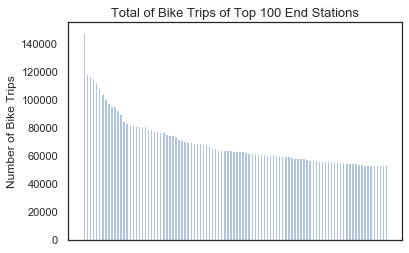

In [323]:
# barplot for end stations with Top 100 Total Bike Trips
plt.figure()
sns.set(style = 'white')
plt.bar(np.arange(0,100),end_station['tripduration'][0:100], color = 'lightsteelblue')
plt.title("Total of Bike Trips of Top 100 End Stations", fontsize = 13)
plt.xticks([])
plt.ylabel('Number of Bike Trips')
plt.show()

Top 100 Busiest End Stations have an average of 165 - 384 biketrips per day

In [350]:
Top_100_End_Station = pd.DataFrame({'end_station_id':end_station['end_station_id'].head(100)}).reset_index().drop('index',axis = 1)
Top_100_End_Station = Top_100_End_Station.astype(object)
Top_100_End_Station

,end_station_id
0,519
1,497
2,402
3,3255
4,426
...,...
95,531
96,304
97,476
98,447


In [349]:
Top_100_End_Station = pd.merge(Top_100_End_Station, bike2019[['end_station_id','end_station_latitude','end_station_longitude','end_station_name']], 
                                 how = 'inner', left_on = 'end_station_id',
                                 right_on = 'end_station_id').drop_duplicates(subset = 'end_station_id')
Top_100_End_Station

,end_station_id,end_station_latitude_x,end_station_longitude_x,end_station_name_x,end_station_latitude_y,end_station_longitude_y,end_station_name_y
0,519,40.751873,-73.977706,Pershing Square North,40.751873,-73.977706,Pershing Square North
148041,497,40.737050,-73.990093,E 17 St & Broadway,40.737050,-73.990093,E 17 St & Broadway
266660,402,40.740343,-73.989551,Broadway & E 22 St,40.740343,-73.989551,Broadway & E 22 St
383720,3255,40.750585,-73.994685,8 Ave & W 31 St,40.750585,-73.994685,8 Ave & W 31 St
499514,426,40.717548,-74.013221,West St & Chambers St,40.717548,-74.013221,West St & Chambers St
...,...,...,...,...,...,...,...
6723753,531,40.718939,-73.992663,Forsyth St & Broome St,40.718939,-73.992663,Forsyth St & Broome St
6777320,304,40.704633,-74.013617,Broadway & Battery Pl,40.704633,-74.013617,Broadway & Battery Pl
6830546,476,40.743943,-73.979661,E 31 St & 3 Ave,40.743943,-73.979661,E 31 St & 3 Ave
6883738,447,40.763707,-73.985162,8 Ave & W 52 St,40.763707,-73.985162,8 Ave & W 52 St


In [328]:
# Map for Top_100_End_Station
top_em = folium.Map(location=[40.7128,-74.0060], zoom_start = 12, tiles = 'CartoDB dark_matter')

top_emc = MarkerCluster(name = "Marker Cluster")

for row in Top_100_End_Station.itertuples():
    pop_up = "station_id:{}, end_station_name:{}".format(row.end_station_id,
                                                           row.end_station_name)
    top_emc.add_child(folium.CircleMarker(location = [row.end_station_latitude,  row.end_station_longitude],
                 popup = pop_up,
                 radius= 5,
                 color="green",
                 fill = True))

top_em.add_child(top_emc)
top_em

- Top 100 start stations locates in the same area with Top 100 end stations, this suggests that the areas where they locate are very likely to be the commercial districts or office districts.
- Top 100 start stations and Top 100 end stations locates closely, suggesting that most of the biketrips are short-route trips

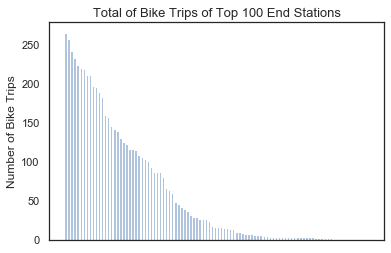

In [329]:
# barplot for end stations with Bottom 100 Total Bike Trips
plt.figure()
sns.set(style = 'white')
plt.bar(np.arange(0,100),end_station['tripduration'][-101:-1], color = 'lightsteelblue')
plt.title("Total of Bike Trips of Top 100 End Stations", fontsize = 13)
plt.xticks([])
plt.ylabel('Number of Bike Trips')
plt.show()

- Bottom End Stations has less than **1** average bike trips each day in 2019

In [354]:
Bottom_100_End_Station = pd.DataFrame({'end_station_id':end_station['end_station_id'].tail(100)}).reset_index().drop('index',axis = 1)
Bottom_100_End_Station = Bottom_100_End_Station.astype(object)
Bottom_100_End_Station

,end_station_id
0,3843
1,3091
2,3855
3,3861
4,3854
...,...
95,3211
96,232
97,3272
98,3273


In [355]:
Bottom_100_End_Station = pd.merge(Bottom_100_End_Station, bike2019[['end_station_id','end_station_latitude','end_station_longitude','end_station_name']], 
                                 how = 'inner', left_on = 'end_station_id',
                                 right_on = 'end_station_id').drop_duplicates(subset = 'end_station_id')
Bottom_100_End_Station

,end_station_id,end_station_latitude,end_station_longitude,end_station_name
0,3843,40.699050,-73.915160,Myrtle Ave & Grove St
257,3091,40.717640,-73.948820,Frost St & Meeker St
498,3855,40.718820,-73.939480,Frost St & Debevoise Ave
731,3861,40.701130,-73.914220,Menahan St & Wyckoff Ave
955,3854,40.716657,-73.936370,Morgan Ave & Maspeth Ave
...,...,...,...,...
5771,3211,40.721525,-74.046305,Newark Ave
5772,232,40.695977,-73.990149,Cadman Plaza E & Tillary St
5773,3272,40.723332,-74.045953,Jersey & 3rd
5774,3273,40.721651,-74.042884,Manila & 1st


In [356]:
# Map for Bottom_100_End_Station
bottom_em = folium.Map(location=[40.7128,-74.0060], zoom_start = 12, tiles = 'CartoDB dark_matter')

bottom_emc = MarkerCluster(name = "Marker Cluster")

for row in Bottom_100_End_Station.itertuples():
    pop_up = "station_id:{}, end_station_name:{}".format(row.end_station_id,
                                                         row.end_station_name)
    bottom_emc.add_child(folium.CircleMarker(location = [row.end_station_latitude,  row.end_station_longitude],
                 popup = pop_up,
                 radius= 5,
                 color="red",
                 fill = True))
bottom_em.add_child(bottom_emc)
bottom_em

### Next, I want to explore what are the most popular trip routes in 2019

### Popular Trip Routes in 2019

In [72]:
bike2019 = pd.read_csv('CitiBike_2019.csv')

In [74]:
route = bike2019.groupby(['start_station_id','end_station_id']).count().reset_index()
route = route[['start_station_id','end_station_id','bikeid']]
route.rename(columns = {'bikeid':'count'}, inplace = True)
route = route.sort_values(by = 'count', ascending = False)
route

,start_station_id,end_station_id,count
101381,432.0,3263.0,7970
159773,2006.0,2006.0,6543
159875,2006.0,3282.0,5898
283826,3423.0,3423.0,5193
344755,3664.0,327.0,5131
...,...,...,...
316358,3553.0,3067.0,1
316357,3553.0,3055.0,1
316356,3553.0,3047.0,1
316355,3553.0,3046.0,1


In [79]:
start_station_info = bike2019[['start_station_id','start_station_name','start_station_latitude','start_station_longitude']].drop_duplicates()
end_station_info = bike2019[['end_station_id','end_station_name','end_station_latitude','end_station_longitude']].drop_duplicates()

In [90]:
Top_25_route = route.head(25)
Top_25_route

,start_station_id,end_station_id,count
101381,432.0,3263.0,7970
159773,2006.0,2006.0,6543
159875,2006.0,3282.0,5898
283826,3423.0,3423.0,5193
344755,3664.0,327.0,5131
56278,327.0,3664.0,5010
229119,3254.0,3254.0,4971
142644,514.0,426.0,4943
145809,519.0,491.0,4806
195933,3118.0,3119.0,4787


In [91]:
Top_25_route = pd.merge(Top_25_route, start_station_info, how = 'inner', left_on = 'start_station_id', right_on = 'start_station_id')
Top_25_route = Top_25_route.drop_duplicates(subset = (['start_station_id','end_station_id']))
Top_25_route


,start_station_id,end_station_id,count,start_station_name,start_station_latitude,start_station_longitude
0,432.0,3263.0,7970,E 7 St & Avenue A,40.726218,-73.983799
1,2006.0,2006.0,6543,Central Park S & 6 Ave,40.765909,-73.976342
2,2006.0,3282.0,5898,Central Park S & 6 Ave,40.765909,-73.976342
3,3423.0,3423.0,5193,West Drive & Prospect Park West,40.661063,-73.979453
5,3664.0,327.0,5131,North Moore St & Greenwich St,40.720195,-74.010301
7,327.0,3664.0,5010,Vesey Pl & River Terrace,40.715338,-74.016584
9,3254.0,3254.0,4971,Soissons Landing,40.692317,-74.014866
10,3254.0,3479.0,4185,Soissons Landing,40.692317,-74.014866
11,514.0,426.0,4943,12 Ave & W 40 St,40.760875,-74.002777
12,519.0,491.0,4806,Pershing Square North,40.751873,-73.977706


In [93]:
Top_25_route = pd.merge(Top_25_route, end_station_info, how = 'inner', left_on = 'end_station_id', right_on = 'end_station_id')
Top_25_route = Top_25_route.drop_duplicates(subset = (['start_station_id','end_station_id']))
Top_25_route

,start_station_id,end_station_id,count,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude
0,432.0,3263.0,7970,E 7 St & Avenue A,40.726218,-73.983799,Cooper Square & Astor Pl,40.729515,-73.990753
2,317.0,3263.0,4388,E 6 St & Avenue B,40.724537,-73.981854,Cooper Square & Astor Pl,40.729515,-73.990753
4,2006.0,2006.0,6543,Central Park S & 6 Ave,40.765909,-73.976342,Central Park S & 6 Ave,40.765909,-73.976342
5,2006.0,3282.0,5898,Central Park S & 6 Ave,40.765909,-73.976342,5 Ave & E 88 St,40.783070,-73.959390
6,3423.0,3423.0,5193,West Drive & Prospect Park West,40.661063,-73.979453,West Drive & Prospect Park West,40.661063,-73.979453
8,3664.0,327.0,5131,North Moore St & Greenwich St,40.720195,-74.010301,Vesey Pl & River Terrace,40.715338,-74.016584
10,327.0,3664.0,5010,Vesey Pl & River Terrace,40.715338,-74.016584,North Moore St & Greenwich St,40.720195,-74.010301
12,3254.0,3254.0,4971,Soissons Landing,40.692317,-74.014866,Soissons Landing,40.692317,-74.014866
13,3479.0,3254.0,4164,Picnic Point,40.685126,-74.025353,Soissons Landing,40.692317,-74.014866
14,3254.0,3479.0,4185,Soissons Landing,40.692317,-74.014866,Picnic Point,40.685126,-74.025353


- Table above shows the most popular biketrip routes in year 2019

In [95]:
# change 'start_station_id', 'end_station_id' to object 
Top_25_route[['start_station_id','end_station_id']] = Top_25_route[['start_station_id','end_station_id']].astype(object)

In [96]:
Top_25_route.dtypes

start_station_id            object
end_station_id              object
count                        int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
dtype: object

In [99]:
Top_25_route.to_csv('Top_25_route_in_2019.csv')

In [100]:
Top_25_route.shape

(25, 9)

- we can use **kepler.gl** to visualize these trip routes. 
- kepler.gl is a very powerful tool for geographic visualization, here is the link: http://kepler.gl/

<img src = "Top_Trip_Routes_2019.png" style = "width:600px; height:400px"/>

- **green:start station**
- **yellow: end station**
- **larger width indicates more bike trips**

- We can see that these popular trip routes are mostly short-route, and they are likely routes where people commute to work or return home from work.


### Next, we will analyze factors that influence accumulated daily bike throughput of station

In [81]:
# parse time and create columns for date, month, year, hour, minute, day of the week, minute of the week
def parse_time(Data,colName):
    Time_List = [datetime.datetime.strptime(x[:-5], "%Y-%m-%d %H:%M:%S") for x in list(Data[colName])]
    Data[colName+'_mod'] = pd.Series(Time_List, index=Data.index)
    Data[colName+'_date'] = pd.Series([x.date() for x in Time_List],index=Data.index)
    Data[colName+'_year'] = pd.Series([x.year for x in Time_List],index=Data.index)
    Data[colName+'_month'] = pd.Series([x.month for x in Time_List],index=Data.index)
    Data[colName+'_day'] = pd.Series([x.day for x in Time_List],index=Data.index)
    Data[colName+'_hour'] = pd.Series([x.hour for x in Time_List],index=Data.index)
    Data[colName+'_minute'] = pd.Series([x.minute for x in Time_List],index=Data.index)
    Data[colName+'_day_of_the_week'] = pd.Series([x.date().weekday() for x in Time_List],index=Data.index)
    Data[colName+'_minute_of_the_day'] = pd.Series(
    [hour * 60 + minute for hour, minute in zip(Data[colName+'_hour'], Data[colName+'_minute'])]
     ,index=Data.index)

In [105]:
# calculate the accumulated daily bike throughput for each station in every minute
def get_acc_delta(Data, date, station_id):
    data_of_the_date = Data[Data['starttime_date'] == date.date()]
    starts = data_of_the_date[data_of_the_date['start_station_id']==station_id] 
    
    data_of_the_date = Data[Data['stoptime_date'] == date.date()]
    stops = data_of_the_date[data_of_the_date['end_station_id']==station_id] 

    leaves = [0] * (60 * 24)
    backs = [0] * (60 * 24)

    for minute in starts['starttime_minute_of_the_day']:
        leaves[minute - 1] -= 1

    for minute in stops['stoptime_minute_of_the_day']:
        backs[minute - 1] += 1
    accDelta = [0]
    for i in range(len(leaves)):
        delta = accDelta[-1] + leaves[i] + backs[i]
        accDelta.append(delta)
    
    return accDelta

In [106]:
def delta_calculation(Data, dates, station_id): 
    Dict = {}
    
    for date in dates:
#       for station_id in start_station.index:
        Dict[(date, station_id)] = get_acc_delta(Data, date, station_id)
            
    df_delta = pd.DataFrame.from_dict(Dict, orient='index').reset_index()
    return df_delta

In [82]:
len(bike2019['starttime'].iloc[1][:-5])

19

In [83]:
parse_time(bike2019,'starttime')

In [111]:
parse_time(bike2019,'stoptime')

## Analyze factors that could possibly influence daily bike throughput for top station

### Station 519

In [112]:
station_519 = bike2019[bike2019['start_station_id'] == 519]
station_519

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,starttime_minute_of_the_day,stoptime_mod,stoptime_date,stoptime_year,stoptime_month,stoptime_day,stoptime_hour,stoptime_minute,stoptime_day_of_the_week,stoptime_minute_of_the_day
186,653,2019-02-01 02:19:01.7500,2019-02-01 02:29:55.6450,519.0,Pershing Square North,40.751873,-73.977706,3711.0,E 13 St & Avenue A,40.729667,...,139,2019-02-01 02:29:55,2019-02-01,2019,2,1,2,29,4,149
364,356,2019-02-01 05:42:59.4360,2019-02-01 05:48:56.0110,519.0,Pershing Square North,40.751873,-73.977706,490.0,8 Ave & W 33 St,40.751551,...,342,2019-02-01 05:48:56,2019-02-01,2019,2,1,5,48,4,348
371,861,2019-02-01 05:44:14.1030,2019-02-01 05:58:35.4030,519.0,Pershing Square North,40.751873,-73.977706,168.0,W 18 St & 6 Ave,40.739713,...,344,2019-02-01 05:58:35,2019-02-01,2019,2,1,5,58,4,358
432,285,2019-02-01 05:56:20.0810,2019-02-01 06:01:06.0600,519.0,Pershing Square North,40.751873,-73.977706,491.0,E 24 St & Park Ave S,40.740964,...,356,2019-02-01 06:01:06,2019-02-01,2019,2,1,6,1,4,361
515,322,2019-02-01 06:08:02.4970,2019-02-01 06:13:24.7510,519.0,Pershing Square North,40.751873,-73.977706,3687.0,E 33 St & 1 Ave,40.743227,...,368,2019-02-01 06:13:24,2019-02-01,2019,2,1,6,13,4,373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19594976,335,2019-05-31 23:12:13.3060,2019-05-31 23:17:48.6250,519.0,Pershing Square North,40.751873,-73.977706,3707.0,Lexington Ave & E 26 St,40.741459,...,1392,2019-05-31 23:17:48,2019-05-31,2019,5,31,23,17,4,1397
19595275,492,2019-05-31 23:21:26.4050,2019-05-31 23:29:39.0200,519.0,Pershing Square North,40.751873,-73.977706,479.0,9 Ave & W 45 St,40.760193,...,1401,2019-05-31 23:29:39,2019-05-31,2019,5,31,23,29,4,1409
19595623,511,2019-05-31 23:32:21.2820,2019-05-31 23:40:52.8060,519.0,Pershing Square North,40.751873,-73.977706,501.0,FDR Drive & E 35 St,40.744219,...,1412,2019-05-31 23:40:52,2019-05-31,2019,5,31,23,40,4,1420
19595754,2230,2019-05-31 23:36:08.0010,2019-06-01 00:13:18.9030,519.0,Pershing Square North,40.751873,-73.977706,427.0,Bus Slip & State St,40.701907,...,1416,2019-06-01 00:13:18,2019-06-01,2019,6,1,0,13,5,13


### January

In [116]:
Jan = station_519[station_519['starttime_month'] == 1]
Jan

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,starttime_minute_of_the_day,stoptime_mod,stoptime_date,stoptime_year,stoptime_month,stoptime_day,stoptime_hour,stoptime_minute,stoptime_day_of_the_week,stoptime_minute_of_the_day
10599966,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,...,4,2019-01-01 00:10:00,2019-01-01,2019,1,1,0,10,1,10
10600089,1771,2019-01-01 00:58:32.2260,2019-01-01 01:28:03.8330,519.0,Pershing Square North,40.751873,-73.977706,3175.0,W 70 St & Amsterdam Ave,40.777480,...,58,2019-01-01 01:28:03,2019-01-01,2019,1,1,1,28,1,88
10600819,1349,2019-01-01 03:51:52.7730,2019-01-01 04:14:22.0720,519.0,Pershing Square North,40.751873,-73.977706,3490.0,E 116 St & 2 Ave,40.796879,...,231,2019-01-01 04:14:22,2019-01-01,2019,1,1,4,14,1,254
10601050,309,2019-01-01 06:09:25.5450,2019-01-01 06:14:35.5180,519.0,Pershing Square North,40.751873,-73.977706,3687.0,E 33 St & 1 Ave,40.743227,...,369,2019-01-01 06:14:35,2019-01-01,2019,1,1,6,14,1,374
10601214,447,2019-01-01 07:12:20.5550,2019-01-01 07:19:47.7710,519.0,Pershing Square North,40.751873,-73.977706,492.0,W 33 St & 7 Ave,40.750200,...,432,2019-01-01 07:19:47,2019-01-01,2019,1,1,7,19,1,439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11565905,465,2019-01-31 20:47:22.9120,2019-01-31 20:55:08.0240,519.0,Pershing Square North,40.751873,-73.977706,469.0,Broadway & W 53 St,40.763441,...,1247,2019-01-31 20:55:08,2019-01-31,2019,1,31,20,55,3,1255
11566059,1124,2019-01-31 20:59:46.0580,2019-01-31 21:18:30.1320,519.0,Pershing Square North,40.751873,-73.977706,3463.0,E 16 St & Irving Pl,40.735367,...,1259,2019-01-31 21:18:30,2019-01-31,2019,1,31,21,18,3,1278
11566325,672,2019-01-31 21:27:12.2530,2019-01-31 21:38:25.2390,519.0,Pershing Square North,40.751873,-73.977706,402.0,Broadway & E 22 St,40.740343,...,1287,2019-01-31 21:38:25,2019-01-31,2019,1,31,21,38,3,1298
11566364,296,2019-01-31 21:31:04.2980,2019-01-31 21:36:00.7920,519.0,Pershing Square North,40.751873,-73.977706,476.0,E 31 St & 3 Ave,40.743943,...,1291,2019-01-31 21:36:00,2019-01-31,2019,1,31,21,36,3,1296


In [118]:
Jan_dates = pd.date_range('2019-01-01', '2019-01-31')

In [120]:
Jan_Delta = delta_calculation(Jan, Jan_dates, 519)
Jan_Delta

,index,0,1,2,3,4,5,6,7,8,...,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440
0,"(2019-01-01 00:00:00, 519)",0,0,0,0,-1,-1,-1,-1,-1,...,-71,-71,-71,-71,-71,-71,-71,-71,-71,-71
1,"(2019-01-02 00:00:00, 519)",0,0,0,0,0,0,0,0,0,...,-363,-363,-363,-363,-363,-363,-363,-363,-363,-363
2,"(2019-01-03 00:00:00, 519)",0,0,0,0,-1,-1,-1,-1,-1,...,-475,-475,-477,-477,-476,-476,-476,-476,-476,-476
3,"(2019-01-04 00:00:00, 519)",0,0,0,0,0,0,0,0,0,...,-400,-400,-400,-401,-401,-401,-401,-401,-401,-401
4,"(2019-01-05 00:00:00, 519)",0,0,0,0,0,0,0,0,0,...,-50,-50,-50,-50,-50,-50,-50,-50,-50,-50
5,"(2019-01-06 00:00:00, 519)",0,0,-1,-1,-1,-1,-1,-1,-1,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
6,"(2019-01-07 00:00:00, 519)",0,0,0,0,0,0,0,0,0,...,-392,-392,-392,-392,-392,-392,-392,-392,-392,-392
7,"(2019-01-08 00:00:00, 519)",0,0,0,0,0,0,0,0,0,...,-428,-428,-428,-428,-428,-428,-428,-428,-428,-428
8,"(2019-01-09 00:00:00, 519)",0,0,0,0,0,0,0,0,0,...,-474,-474,-474,-474,-474,-474,-474,-474,-474,-474
9,"(2019-01-10 00:00:00, 519)",0,0,0,0,-1,-1,-1,-1,-1,...,-419,-419,-419,-419,-419,-419,-419,-419,-419,-419


In [130]:
time = list()
for i in Jan_Delta['index']:
    time.append(i[0]) 
time

[Timestamp('2019-01-01 00:00:00', freq='D'),
 Timestamp('2019-01-02 00:00:00', freq='D'),
 Timestamp('2019-01-03 00:00:00', freq='D'),
 Timestamp('2019-01-04 00:00:00', freq='D'),
 Timestamp('2019-01-05 00:00:00', freq='D'),
 Timestamp('2019-01-06 00:00:00', freq='D'),
 Timestamp('2019-01-07 00:00:00', freq='D'),
 Timestamp('2019-01-08 00:00:00', freq='D'),
 Timestamp('2019-01-09 00:00:00', freq='D'),
 Timestamp('2019-01-10 00:00:00', freq='D'),
 Timestamp('2019-01-11 00:00:00', freq='D'),
 Timestamp('2019-01-12 00:00:00', freq='D'),
 Timestamp('2019-01-13 00:00:00', freq='D'),
 Timestamp('2019-01-14 00:00:00', freq='D'),
 Timestamp('2019-01-15 00:00:00', freq='D'),
 Timestamp('2019-01-16 00:00:00', freq='D'),
 Timestamp('2019-01-17 00:00:00', freq='D'),
 Timestamp('2019-01-18 00:00:00', freq='D'),
 Timestamp('2019-01-19 00:00:00', freq='D'),
 Timestamp('2019-01-20 00:00:00', freq='D'),
 Timestamp('2019-01-21 00:00:00', freq='D'),
 Timestamp('2019-01-22 00:00:00', freq='D'),
 Timestamp

In [131]:
Jan_Delta['date'] = pd.Series(time)
Jan_Delta

,index,0,1,2,3,4,5,6,7,8,...,1432,1433,1434,1435,1436,1437,1438,1439,1440,date
0,"(2019-01-01 00:00:00, 519)",0,0,0,0,-1,-1,-1,-1,-1,...,-71,-71,-71,-71,-71,-71,-71,-71,-71,2019-01-01
1,"(2019-01-02 00:00:00, 519)",0,0,0,0,0,0,0,0,0,...,-363,-363,-363,-363,-363,-363,-363,-363,-363,2019-01-02
2,"(2019-01-03 00:00:00, 519)",0,0,0,0,-1,-1,-1,-1,-1,...,-475,-477,-477,-476,-476,-476,-476,-476,-476,2019-01-03
3,"(2019-01-04 00:00:00, 519)",0,0,0,0,0,0,0,0,0,...,-400,-400,-401,-401,-401,-401,-401,-401,-401,2019-01-04
4,"(2019-01-05 00:00:00, 519)",0,0,0,0,0,0,0,0,0,...,-50,-50,-50,-50,-50,-50,-50,-50,-50,2019-01-05
5,"(2019-01-06 00:00:00, 519)",0,0,-1,-1,-1,-1,-1,-1,-1,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,2019-01-06
6,"(2019-01-07 00:00:00, 519)",0,0,0,0,0,0,0,0,0,...,-392,-392,-392,-392,-392,-392,-392,-392,-392,2019-01-07
7,"(2019-01-08 00:00:00, 519)",0,0,0,0,0,0,0,0,0,...,-428,-428,-428,-428,-428,-428,-428,-428,-428,2019-01-08
8,"(2019-01-09 00:00:00, 519)",0,0,0,0,0,0,0,0,0,...,-474,-474,-474,-474,-474,-474,-474,-474,-474,2019-01-09
9,"(2019-01-10 00:00:00, 519)",0,0,0,0,-1,-1,-1,-1,-1,...,-419,-419,-419,-419,-419,-419,-419,-419,-419,2019-01-10


In [132]:
Jan_Delta.drop(['index'],axis=1,inplace=True)
Jan_Delta.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1432,1433,1434,1435,1436,1437,1438,1439,1440,date
0,0,0,0,0,-1,-1,-1,-1,-1,-1,...,-71,-71,-71,-71,-71,-71,-71,-71,-71,2019-01-01
1,0,0,0,0,0,0,0,0,0,0,...,-363,-363,-363,-363,-363,-363,-363,-363,-363,2019-01-02
2,0,0,0,0,-1,-1,-1,-1,-1,-1,...,-475,-477,-477,-476,-476,-476,-476,-476,-476,2019-01-03
3,0,0,0,0,0,0,0,0,0,0,...,-400,-400,-401,-401,-401,-401,-401,-401,-401,2019-01-04
4,0,0,0,0,0,0,0,0,0,0,...,-50,-50,-50,-50,-50,-50,-50,-50,-50,2019-01-05
5,0,0,-1,-1,-1,-1,-1,-1,-1,-1,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,2019-01-06
6,0,0,0,0,0,0,0,0,0,0,...,-392,-392,-392,-392,-392,-392,-392,-392,-392,2019-01-07
7,0,0,0,0,0,0,0,0,0,0,...,-428,-428,-428,-428,-428,-428,-428,-428,-428,2019-01-08
8,0,0,0,0,0,0,0,0,0,0,...,-474,-474,-474,-474,-474,-474,-474,-474,-474,2019-01-09
9,0,0,0,0,-1,-1,-1,-1,-1,-1,...,-419,-419,-419,-419,-419,-419,-419,-419,-419,2019-01-10


In [133]:
weekdays = list()
for i in Jan_Delta['date']:
    if i.weekday() in (0,1,2,3,4):
        weekdays.append('weekday')
    else:
        weekdays.append('weekend')  

In [134]:
Jan_Delta['day_of_week'] = pd.Series(weekdays)
Jan_Delta.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1433,1434,1435,1436,1437,1438,1439,1440,date,day_of_week
0,0,0,0,0,-1,-1,-1,-1,-1,-1,...,-71,-71,-71,-71,-71,-71,-71,-71,2019-01-01,weekday
1,0,0,0,0,0,0,0,0,0,0,...,-363,-363,-363,-363,-363,-363,-363,-363,2019-01-02,weekday
2,0,0,0,0,-1,-1,-1,-1,-1,-1,...,-477,-477,-476,-476,-476,-476,-476,-476,2019-01-03,weekday
3,0,0,0,0,0,0,0,0,0,0,...,-400,-401,-401,-401,-401,-401,-401,-401,2019-01-04,weekday
4,0,0,0,0,0,0,0,0,0,0,...,-50,-50,-50,-50,-50,-50,-50,-50,2019-01-05,weekend
5,0,0,-1,-1,-1,-1,-1,-1,-1,-1,...,-99,-99,-99,-99,-99,-99,-99,-99,2019-01-06,weekend
6,0,0,0,0,0,0,0,0,0,0,...,-392,-392,-392,-392,-392,-392,-392,-392,2019-01-07,weekday
7,0,0,0,0,0,0,0,0,0,0,...,-428,-428,-428,-428,-428,-428,-428,-428,2019-01-08,weekday
8,0,0,0,0,0,0,0,0,0,0,...,-474,-474,-474,-474,-474,-474,-474,-474,2019-01-09,weekday
9,0,0,0,0,-1,-1,-1,-1,-1,-1,...,-419,-419,-419,-419,-419,-419,-419,-419,2019-01-10,weekday


In [146]:
Jan_plot = Jan_Delta.groupby('day_of_week').mean().reset_index()
Jan_plot

,day_of_week,0,1,2,3,4,5,6,7,8,...,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440
0,weekday,0.0,-0.043478,-0.086957,-0.173913,-0.304348,-0.391304,-0.391304,-0.434783,-0.434783,...,-355.173913,-355.26087,-355.434783,-355.521739,-355.478261,-355.521739,-355.521739,-355.521739,-355.521739,-355.521739
1,weekend,0.0,0.000000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,...,-81.375000,-81.37500,-81.375000,-81.375000,-81.375000,-81.375000,-81.375000,-81.375000,-81.375000,-81.500000


In [223]:
# draw line plot to analyze the weekday and weekend patterns of daily bike throughput
def weekday_weekend_pattern(station_id, Data, month, dates):
    station_Data = Data[(Data['start_station_id'] == station_id)|(Data['end_station_id'] == station_id)]
    Month_Data = station_Data[station_Data['starttime_month'] == month]
    Delta = delta_calculation(Month_Data, dates, station_id)
    time = list()
    for i in Delta['index']:
        time.append(i[0]) 
    Delta['date'] = pd.Series(time)
    Delta.drop(['index'],axis=1,inplace=True)
    weekdays = list()
    for i in Delta['date']:
        if i.weekday() in (0,1,2,3,4):
            weekdays.append('weekday')
        else:
            weekdays.append('weekend')
    Delta['day_of_week'] = pd.Series(weekdays)
    plot_Data = Delta.groupby('day_of_week').mean().reset_index()
    plt.figure()
    plt.plot(plot_Data.iloc[0,1:],label = 'weekday')
    plt.plot(plot_Data.iloc[1,1:],label = 'weekend')
    plt.legend()    

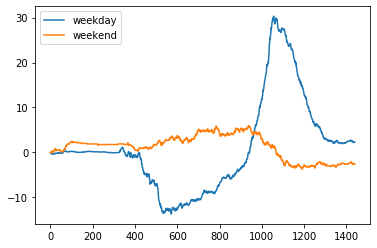

In [289]:
dates = pd.date_range('2019-01-01', '2019-01-31')
weekday_weekend_pattern(519, bike2019, 1, dates)

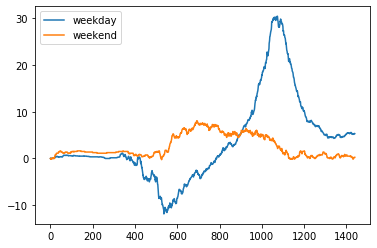

In [224]:
dates = pd.date_range('2019-02-01', '2019-02-28')
weekday_weekend_pattern(519, bike2019, 2, dates)

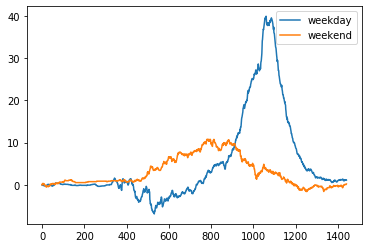

In [225]:
dates = pd.date_range('2019-03-01', '2019-03-30')
weekday_weekend_pattern(519, bike2019, 3, dates)

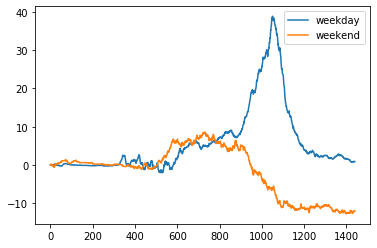

In [226]:
dates = pd.date_range('2019-04-01', '2019-04-30')
weekday_weekend_pattern(519, bike2019, 4, dates)

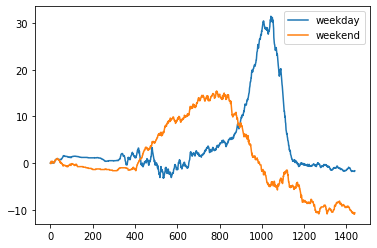

In [228]:
dates = pd.date_range('2019-05-01', '2019-05-31')
weekday_weekend_pattern(519, bike2019, 5, dates)

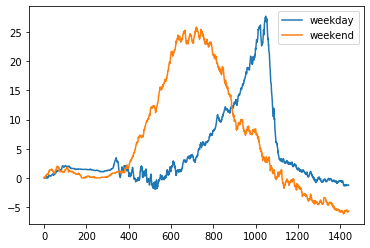

In [229]:
dates = pd.date_range('2019-06-01', '2019-06-30')
weekday_weekend_pattern(519, bike2019, 6, dates)

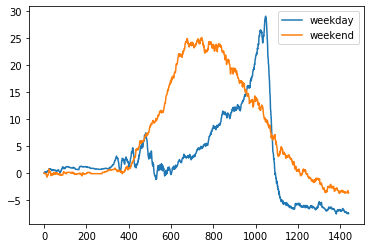

In [230]:
dates = pd.date_range('2019-07-01', '2019-07-30')
weekday_weekend_pattern(519, bike2019, 7, dates)

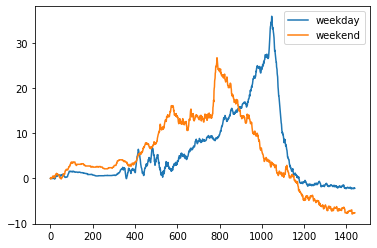

In [231]:
dates = pd.date_range('2019-08-01', '2019-08-30')
weekday_weekend_pattern(519, bike2019, 8, dates)

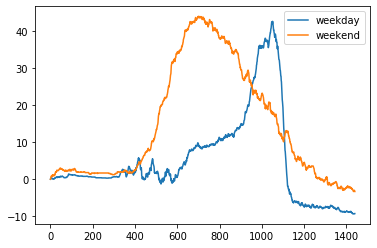

In [232]:
dates = pd.date_range('2019-09-01', '2019-09-30')
weekday_weekend_pattern(519, bike2019, 9, dates)

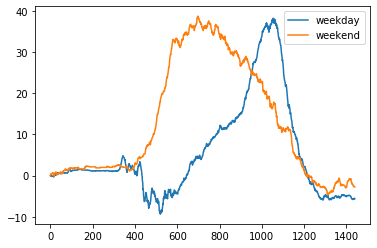

In [233]:
dates = pd.date_range('2019-10-01', '2019-10-30')
weekday_weekend_pattern(519, bike2019, 10, dates)

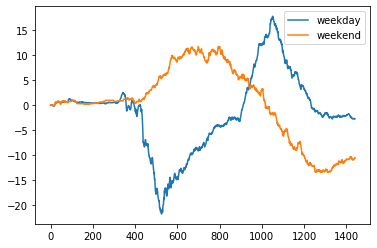

In [234]:
dates = pd.date_range('2019-11-01', '2019-11-30')
weekday_weekend_pattern(519, bike2019, 11, dates)

### Station 497

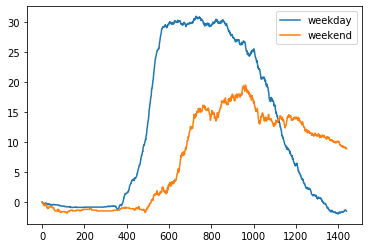

In [290]:
dates = pd.date_range('2019-01-01', '2019-01-30')
weekday_weekend_pattern(497, bike2019, 1, dates)

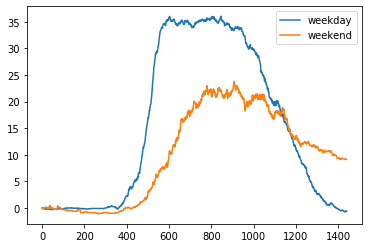

In [236]:
dates = pd.date_range('2019-02-01', '2019-02-28')
weekday_weekend_pattern(497, bike2019, 2, dates)

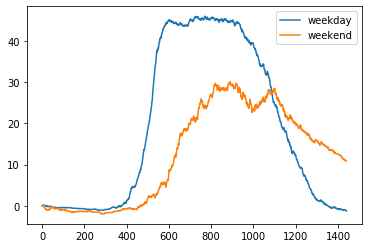

In [237]:
dates = pd.date_range('2019-03-01', '2019-03-30')
weekday_weekend_pattern(497, bike2019, 3, dates)

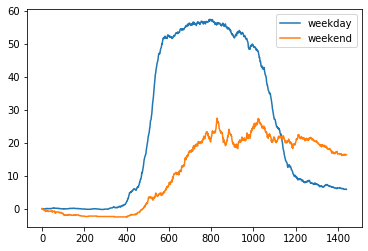

In [238]:
dates = pd.date_range('2019-04-01', '2019-04-30')
weekday_weekend_pattern(497, bike2019, 4, dates)

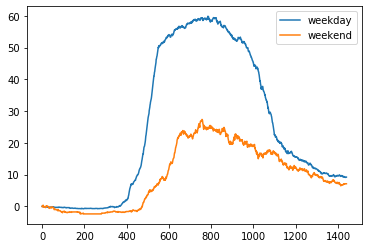

In [239]:
dates = pd.date_range('2019-05-01', '2019-05-31')
weekday_weekend_pattern(497, bike2019, 5, dates)

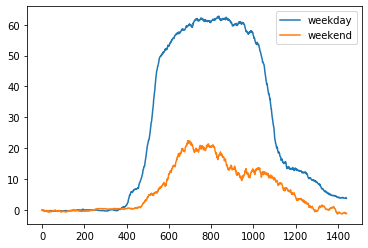

In [240]:
dates = pd.date_range('2019-06-01', '2019-06-30')
weekday_weekend_pattern(497, bike2019, 6, dates)

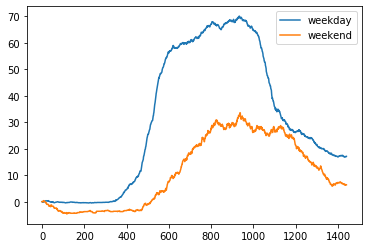

In [241]:
dates = pd.date_range('2019-07-01', '2019-07-31')
weekday_weekend_pattern(497, bike2019, 7, dates)

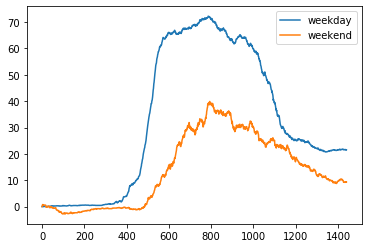

In [242]:
dates = pd.date_range('2019-08-01', '2019-08-31')
weekday_weekend_pattern(497, bike2019, 8, dates)

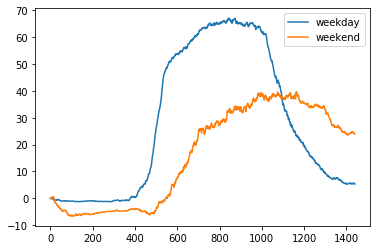

In [243]:
dates = pd.date_range('2019-09-01', '2019-09-30')
weekday_weekend_pattern(497, bike2019, 9, dates)

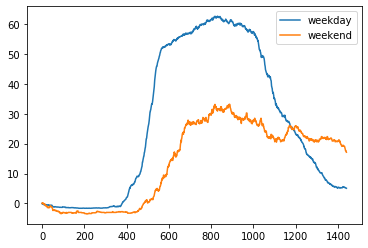

In [244]:
dates = pd.date_range('2019-10-01', '2019-10-31')
weekday_weekend_pattern(497, bike2019, 10, dates)

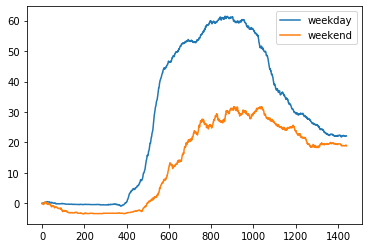

In [245]:
dates = pd.date_range('2019-11-01', '2019-11-30')
weekday_weekend_pattern(497, bike2019, 11, dates)

daily bike throughput on weekdays is quite stable across months, while daily bike throughput on weekends tend to vary slightly across months. 

We can conclude that **seasonality** has bigger impacts on daily bike throughput on weekends than weekdays. It could be of the reason that people need to go to work no matther what season it is.

## Bottom Station

### station 3567

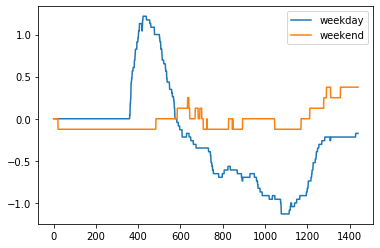

In [246]:
dates = pd.date_range('2019-01-01', '2019-01-31')
weekday_weekend_pattern(3567, bike2019, 1, dates)

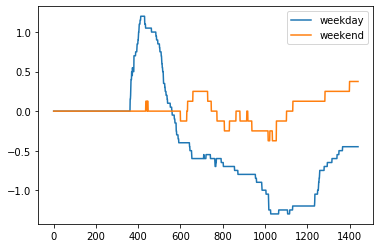

In [248]:
dates = pd.date_range('2019-02-01', '2019-02-28')
weekday_weekend_pattern(3567, bike2019, 2, dates)

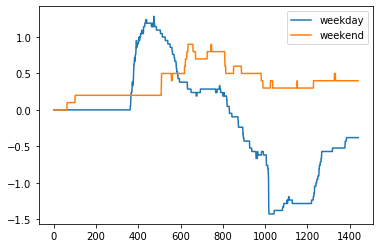

In [249]:
dates = pd.date_range('2019-03-01', '2019-03-31')
weekday_weekend_pattern(3567, bike2019, 3, dates)

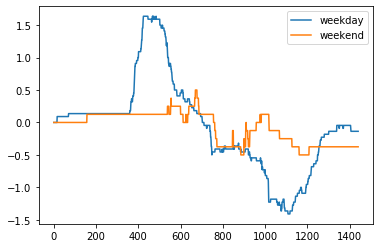

In [250]:
dates = pd.date_range('2019-04-01', '2019-04-30')
weekday_weekend_pattern(3567, bike2019, 4, dates)

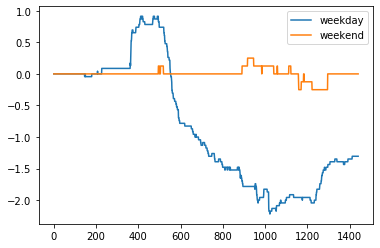

In [251]:
dates = pd.date_range('2019-05-01', '2019-05-31')
weekday_weekend_pattern(3567, bike2019, 5, dates)

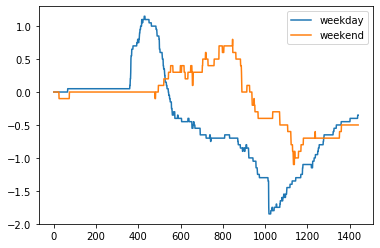

In [252]:
dates = pd.date_range('2019-06-01', '2019-06-30')
weekday_weekend_pattern(3567, bike2019, 6, dates)

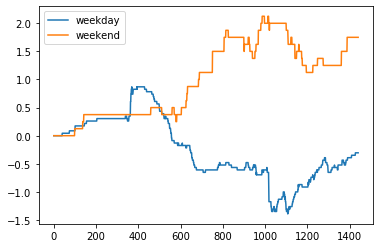

In [253]:
dates = pd.date_range('2019-07-01', '2019-07-31')
weekday_weekend_pattern(3567, bike2019, 7, dates)

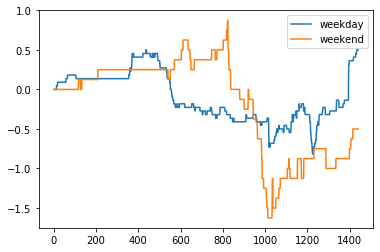

In [254]:
dates = pd.date_range('2019-08-01', '2019-08-30')
weekday_weekend_pattern(3567, bike2019, 8, dates)

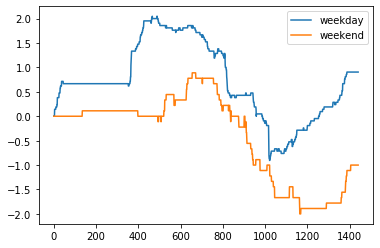

In [255]:
dates = pd.date_range('2019-09-01', '2019-09-30')
weekday_weekend_pattern(3567, bike2019, 9, dates)

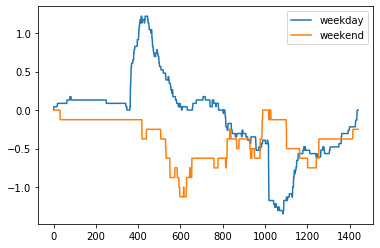

In [257]:
dates = pd.date_range('2019-10-01', '2019-10-31')
weekday_weekend_pattern(3567, bike2019, 10, dates)

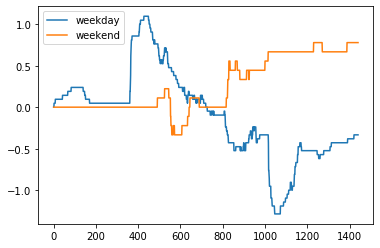

In [259]:
dates = pd.date_range('2019-11-01', '2019-11-30')
weekday_weekend_pattern(3567, bike2019, 11, dates)

### station 3371

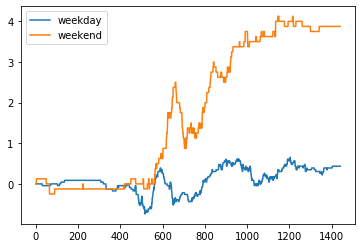

In [260]:
dates = pd.date_range('2019-01-01', '2019-01-31')
weekday_weekend_pattern(3371, bike2019, 1, dates)

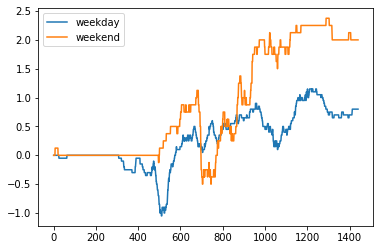

In [261]:
dates = pd.date_range('2019-02-01', '2019-02-28')
weekday_weekend_pattern(3371, bike2019, 2, dates)

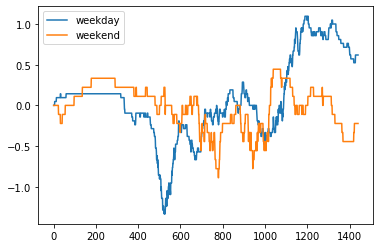

In [262]:
dates = pd.date_range('2019-03-01', '2019-03-30')
weekday_weekend_pattern(3371, bike2019, 3, dates)

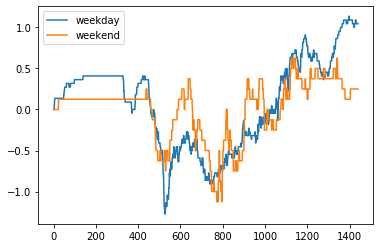

In [263]:
dates = pd.date_range('2019-04-01', '2019-04-30')
weekday_weekend_pattern(3371, bike2019, 4, dates)

### station 3855

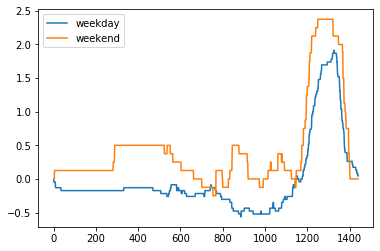

In [286]:
dates = pd.date_range('2019-10-01', '2019-10-31')
weekday_weekend_pattern(3855, bike2019, 10, dates)

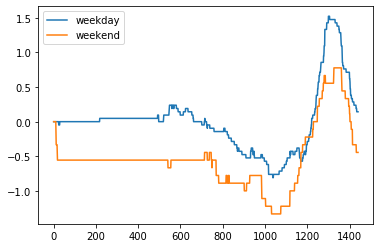

In [288]:
dates = pd.date_range('2019-11-01', '2019-11-30')
weekday_weekend_pattern(3855, bike2019, 11, dates)

It is very hard to find a robust pattern for bottom stations and the daily bike throughput pattern is highly sensitive to occasional events. Also, there are no enough data points for us to utilize, so if we want to consider building machine learning models to predict the bike throughput in certain minute, we might consider exclude these bottom stations.